In [229]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [230]:
dp=pd.read_csv('/Users/mugilmr/Downloads/diabetes.csv')

In [231]:
dp.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [232]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [233]:
dp.shape

(768, 9)

In [234]:
dp.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [235]:
dp.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [236]:
dp_dup=dp.duplicated()
print(dp_dup)

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool


In [237]:
dp['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [238]:
dp.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [239]:
X=dp.drop(columns='Outcome',axis=1)
Y=dp['Outcome']

In [240]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [241]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [242]:
import matplotlib.pyplot as plt
correlation_mat=x.corr()
print(correlation_mat)

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

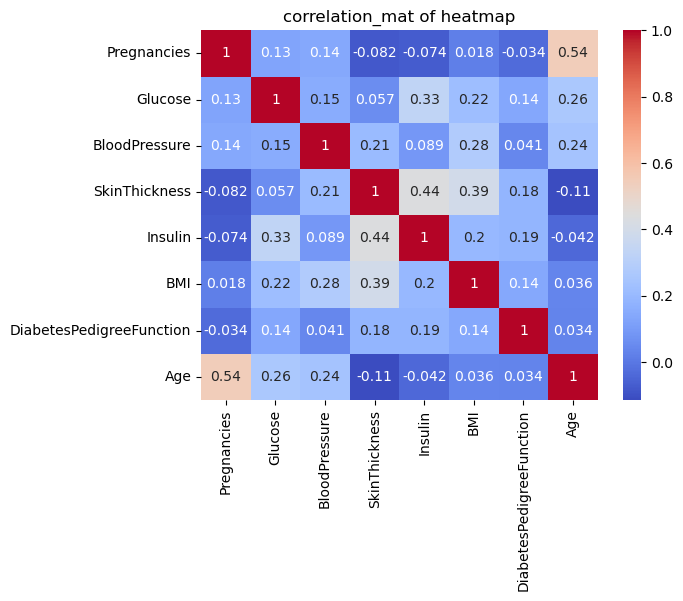

In [ ]:
sns.heatmap(correlation_mat,cmap='coolwarm',annot=True)
plt.title('correlation_mat of heatmap')
plt.show()

<Axes: xlabel='BloodPressure', ylabel='count'>

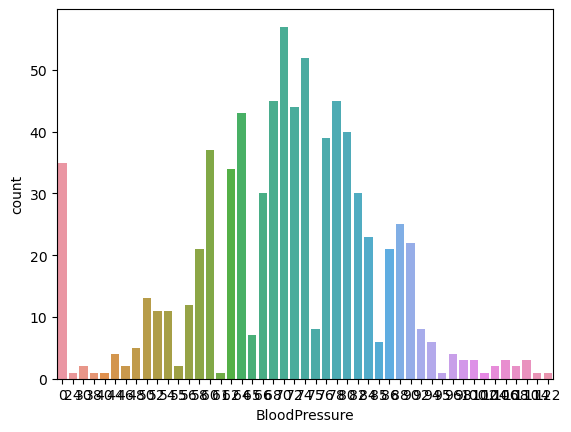

In [ ]:
sns.countplot(x='BloodPressure',data=dp)

<Axes: xlabel='Glucose', ylabel='count'>

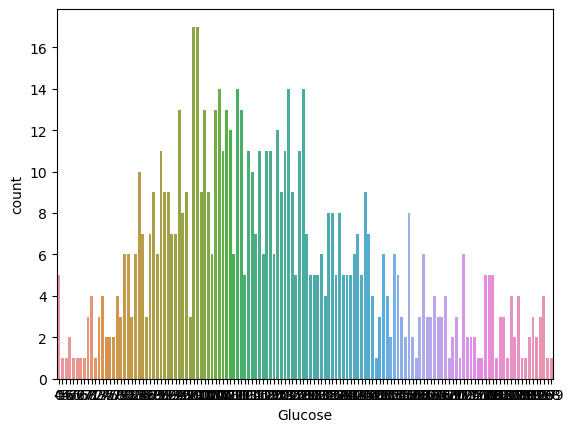

In [ ]:
sns.countplot(x='Glucose',data=dp)

<Axes: xlabel='BMI', ylabel='Count'>

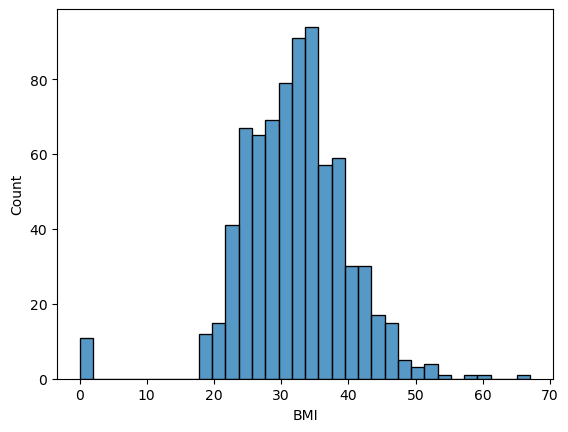

In [ ]:
sns.histplot(x='BMI',data=dp)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
stand_data=scalar.fit_transform(X)
print(stand_data)


[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
x=stand_data
y=dp['Outcome']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


In [ ]:
print(x_train)


[[-5.47918591e-01 -1.06080207e+00 -5.74127746e-01 ...  8.97854505e-02
  -9.23782733e-01 -7.01198424e-01]
 [ 1.53084665e+00  1.97502103e+00  8.21711501e-01 ... -2.52896512e-01
   2.23828152e+00  1.34090765e+00]
 [ 4.60143347e-02  7.23135213e-01 -5.74127746e-01 ... -3.16356135e-01
  -5.58348373e-01  3.19854614e-01]
 ...
 [-5.47918591e-01  1.12999810e+00  2.53036252e-01 ...  9.40144394e-01
  -1.02042653e+00 -2.75759658e-01]
 [ 6.39947260e-01  8.48323795e-01  1.49640753e-01 ...  2.04012771e-01
   4.68491977e-01  1.42599540e+00]
 [-8.44885053e-01  2.22380888e-01  1.49378225e+00 ...  9.41978774e-04
   2.56445434e+00 -2.04963989e-02]]


In [ ]:
print(y_train)

331    0
245    1
107    0
669    0
585    0
      ..
199    1
137    0
645    0
0      1
187    1
Name: Outcome, Length: 691, dtype: int64


In [ ]:
model=svm.SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
x_pred=model.predict(x_train)
training_acc=accuracy_score(x_pred,y_train)
print(training_acc)

0.7899022801302932


In [ ]:
x_pred=model.predict(x_test)
testing_acc=accuracy_score(x_pred,y_test)
print(testing_acc)

0.7727272727272727


In [ ]:
input_data=(5,166,72,19,175,25.8,0.587,51)

input_numpy=np.asarray(input_data)

input_reshape=input_numpy.reshape(1,-1)
st_data=scalar.transform(input_reshape)
print(st_data)
prediction=model.predict(st_data)
print(prediction)
if (prediction[0]==0):
    print("Patient is non diabetic")
else:
    print("patient is diabetic")

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
patient is diabetic


/Users/mugilmr/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.decomposition import PCA
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

pca=PCA(n_components=8)
x_train_pca=pca.fit_transform(x_train_scaled)
x_test_pca=pca.transform(x_test_scaled)

model=svm.SVC(kernel='linear')
model.fit(x_train_pca,y_train)

y_pred=model.predict(x_test_pca)
accuracy=accuracy_score(y_pred,y_test)

print("classification:")
print(classification_report(y_pred,y_test))

print("confusion matrix:")
print(confusion_matrix(y_pred,y_test))

classification
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       117
           1       0.52      0.76      0.62        37

    accuracy                           0.77       154
   macro avg       0.71      0.77      0.73       154
weighted avg       0.82      0.77      0.79       154

confusion matrix:
[[91 26]
 [ 9 28]]


In [ ]:
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

pca=PCA(n_components=8)
x_train_pca=pca.fit_transform(x_train_scaled)
x_test_pca=pca.transform(x_test_scaled)

model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train_pca,y_train)

y_pred=model.predict(x_test_pca)
accuracy=accuracy_score(y_pred,y_test)

print("classification:")
print(classification_report(y_pred,y_test))

print("confusion matrix:")
print(confusion_matrix(y_pred,y_test))

classification:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       122
           1       0.41      0.69      0.51        32

    accuracy                           0.73       154
   macro avg       0.65      0.71      0.66       154
weighted avg       0.80      0.73      0.75       154

confusion matrix:
[[90 32]
 [10 22]]


In [ ]:
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

pca=PCA(n_components=8)
x_train_pca=pca.fit_transform(x_train_scaled)
x_test_pca=pca.transform(x_test_scaled)

model=GaussianNB()
model.fit(x_train_pca,y_train)

y_pred=model.predict(x_test_pca)
accuracy=accuracy_score(y_pred,y_test)

print("classification:")
print(classification_report(y_pred,y_test))

print("confusion matrix:")
print(confusion_matrix(y_pred,y_test))

classification:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82       116
           1       0.50      0.71      0.59        38

    accuracy                           0.75       154
   macro avg       0.70      0.74      0.71       154
weighted avg       0.79      0.75      0.77       154

confusion matrix:
[[89 27]
 [11 27]]


In [244]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg']
}

In [245]:
grid_search = GridSearchCV(LogisticRegression, param_grid, cv=5, n_jobs=-1)

In [249]:
grid_search

GridSearchCV(cv=5,
             estimator=<class 'sklearn.linear_model._logistic.LogisticRegression'>,
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']})

In [253]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression, x, y, cv=1, scoring = 'accuracy')

InvalidParameterError: The 'cv' parameter of cross_validate must be an int in the range [2, inf), an object implementing 'split' and 'get_n_splits', an iterable or None. Got 1 instead.

In [257]:
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

pca=PCA(n_components=8)
x_train_pca=pca.fit_transform(x_train_scaled)
x_test_pca=pca.transform(x_test_scaled)

model1=LogisticRegression(solver='lbfgs',random_state=1)
model1.fit(x_train_pca,y_train)

y_pred=model1.predict(x_test_pca)
accuracy=accuracy_score(y_pred,y_test)

print("classification:")
print(classification_report(y_pred,y_test))

print("confusion matrix:")
print(confusion_matrix(y_pred,y_test))

classification:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       115
           1       0.52      0.72      0.60        39

    accuracy                           0.76       154
   macro avg       0.70      0.75      0.72       154
weighted avg       0.80      0.76      0.77       154

confusion matrix:
[[89 26]
 [11 28]]


In [258]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print best hyperparameters and best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate model on test set
test_score = grid_search.score(x_test, y_test)
print("Test set score:", test_score)

Best hyperparameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.7817139810742371
Test set score: 0.7597402597402597


/Users/mugilmr/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mugilmr/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mugilmr/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mugilmr/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_lo

In [259]:
scores = cross_val_score(model1, x, y, cv=5, scoring = 'accuracy')

In [260]:
scores

array([0.77272727, 0.74675325, 0.75324675, 0.81699346, 0.76470588])